## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation

def build_mlp(input_shape, output_units=10, normBeforeAct=True, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
            if normBeforeAct:  
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
        else:
            
            x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1))(x)
            if normBeforeAct:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
BEFORE_ACTIVATE = [True, False]

In [7]:
results = {}

for i, (before, bz) in enumerate(itertools.product(BEFORE_ACTIVATE, BATCH_SIZE)):
    print("Numbers of exp: %i, use_preact: %s, batch_size: %i" % (i, before, bz))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bz, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, use_preact: True, batch_size: 32
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activatio

1563/1563 [==============================] - 25s 16ms/step - loss: 0.3298 - accuracy: 0.8844 - val_loss: 2.5100 - val_accuracy: 0.4992
Epoch 45/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.3086 - accuracy: 0.8904 - val_loss: 2.4543 - val_accuracy: 0.5188
Epoch 46/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3115 - accuracy: 0.8894 - val_loss: 2.7382 - val_accuracy: 0.5004
Epoch 47/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3115 - accuracy: 0.8903 - val_loss: 2.5010 - val_accuracy: 0.5080
Epoch 48/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.3040 - accuracy: 0.8913 - val_loss: 2.2867 - val_accuracy: 0.5265
Epoch 49/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2961 - accuracy: 0.8930 - val_loss: 2.4701 - val_accuracy: 0.5120
Epoch 50/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2906 - accuracy: 0.8964 - val_loss: 2.6121 - val_

391/391 [==============================] - 10s 26ms/step - loss: 0.1769 - accuracy: 0.9387 - val_loss: 3.2425 - val_accuracy: 0.4370
Epoch 38/50
391/391 [==============================] - 12s 30ms/step - loss: 0.1644 - accuracy: 0.9422 - val_loss: 3.2090 - val_accuracy: 0.4391
Epoch 39/50
391/391 [==============================] - 10s 26ms/step - loss: 0.1648 - accuracy: 0.9434 - val_loss: 3.0924 - val_accuracy: 0.4669
Epoch 40/50
391/391 [==============================] - 10s 26ms/step - loss: 0.1645 - accuracy: 0.9421 - val_loss: 3.3650 - val_accuracy: 0.4655
Epoch 41/50
391/391 [==============================] - 13s 32ms/step - loss: 0.1544 - accuracy: 0.9461 - val_loss: 3.2653 - val_accuracy: 0.4780
Epoch 42/50
391/391 [==============================] - 13s 34ms/step - loss: 0.1437 - accuracy: 0.9498 - val_loss: 3.0673 - val_accuracy: 0.4710
Epoch 43/50
391/391 [==============================] - 13s 32ms/step - loss: 0.1446 - accuracy: 0.9499 - val_loss: 3.3144 - val_accuracy: 0.48

196/196 [==============================] - 4s 20ms/step - loss: 0.1541 - accuracy: 0.9472 - val_loss: 2.8959 - val_accuracy: 0.4590
Epoch 31/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1457 - accuracy: 0.9509 - val_loss: 2.9929 - val_accuracy: 0.4589
Epoch 32/50
196/196 [==============================] - 4s 21ms/step - loss: 0.1526 - accuracy: 0.9473 - val_loss: 3.1543 - val_accuracy: 0.4699
Epoch 33/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1539 - accuracy: 0.9470 - val_loss: 3.0425 - val_accuracy: 0.4497
Epoch 34/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1545 - accuracy: 0.9459 - val_loss: 3.2348 - val_accuracy: 0.4424
Epoch 35/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1465 - accuracy: 0.9486 - val_loss: 3.3710 - val_accuracy: 0.4521
Epoch 36/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1255 - accuracy: 0.9578 - val_loss: 3.2508 - val_accuracy: 0.4499
Epoc

1563/1563 [==============================] - 20s 12ms/step - loss: 0.6028 - accuracy: 0.7851 - val_loss: 1.7630 - val_accuracy: 0.5148
Epoch 24/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5784 - accuracy: 0.7917 - val_loss: 1.8295 - val_accuracy: 0.5091
Epoch 25/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5552 - accuracy: 0.8015 - val_loss: 1.9504 - val_accuracy: 0.5024
Epoch 26/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5354 - accuracy: 0.8081 - val_loss: 1.9882 - val_accuracy: 0.4960
Epoch 27/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5201 - accuracy: 0.8132 - val_loss: 1.9416 - val_accuracy: 0.5196
Epoch 28/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5002 - accuracy: 0.8219 - val_loss: 1.8898 - val_accuracy: 0.5086
Epoch 29/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4882 - accuracy: 0.8264 - val_loss: 2.3555 - val_

391/391 [==============================] - 7s 18ms/step - loss: 0.5231 - accuracy: 0.8141 - val_loss: 1.8231 - val_accuracy: 0.4642
Epoch 17/50
391/391 [==============================] - 7s 19ms/step - loss: 0.4894 - accuracy: 0.8262 - val_loss: 2.2858 - val_accuracy: 0.4260
Epoch 18/50
391/391 [==============================] - 7s 17ms/step - loss: 0.4521 - accuracy: 0.8401 - val_loss: 2.2311 - val_accuracy: 0.4460
Epoch 19/50
391/391 [==============================] - 7s 17ms/step - loss: 0.4131 - accuracy: 0.8562 - val_loss: 2.2711 - val_accuracy: 0.4186
Epoch 20/50
391/391 [==============================] - 6s 16ms/step - loss: 0.3864 - accuracy: 0.8633 - val_loss: 2.5858 - val_accuracy: 0.4408
Epoch 21/50
391/391 [==============================] - 7s 18ms/step - loss: 0.3632 - accuracy: 0.8733 - val_loss: 2.4951 - val_accuracy: 0.4386
Epoch 22/50
391/391 [==============================] - 8s 20ms/step - loss: 0.3429 - accuracy: 0.8772 - val_loss: 2.5668 - val_accuracy: 0.4232
Epoc

196/196 [==============================] - 4s 21ms/step - loss: 0.7923 - accuracy: 0.7197 - val_loss: 2.4997 - val_accuracy: 0.3338
Epoch 11/50
196/196 [==============================] - 4s 21ms/step - loss: 0.7326 - accuracy: 0.7404 - val_loss: 1.7390 - val_accuracy: 0.4310
Epoch 12/50
196/196 [==============================] - 4s 21ms/step - loss: 0.6690 - accuracy: 0.7636 - val_loss: 1.9330 - val_accuracy: 0.4053
Epoch 13/50
196/196 [==============================] - 4s 21ms/step - loss: 0.6147 - accuracy: 0.7834 - val_loss: 1.9041 - val_accuracy: 0.3900
Epoch 14/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5581 - accuracy: 0.8033 - val_loss: 1.8839 - val_accuracy: 0.4293
Epoch 15/50
196/196 [==============================] - 4s 23ms/step - loss: 0.5047 - accuracy: 0.8243 - val_loss: 2.1700 - val_accuracy: 0.4042
Epoch 16/50
196/196 [==============================] - 4s 21ms/step - loss: 0.4714 - accuracy: 0.8345 - val_loss: 2.0955 - val_accuracy: 0.4295
Epoc

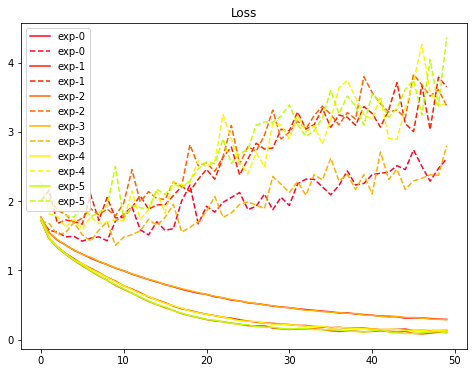

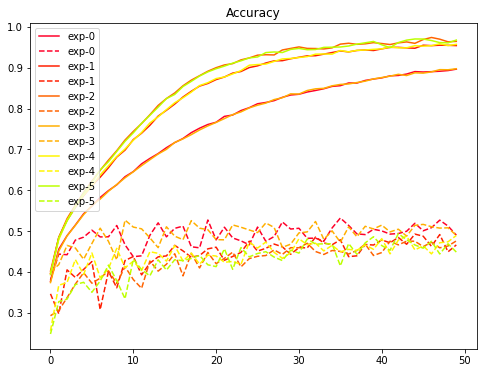

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()